In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls

CAR DETAILS FROM CAR DEKHO.csv
Car details v3.csv
car data.csv
car price.ipynb


In [3]:
!pwd

/c/Users/Admin/Documents/Grrass/Data Science/ML/Linear Regression/car


In [4]:
def load_data(path):
    return pd.read_csv(path)

In [5]:
data=load_data("CAR DETAILS FROM CAR DEKHO.csv")

In [6]:
car_data=load_data("car data.csv")

In [7]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
details=load_data('car details v3.csv')

In [9]:
details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [10]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [11]:
#check null values and type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [12]:
#check description of stats variable
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [13]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

# EDA

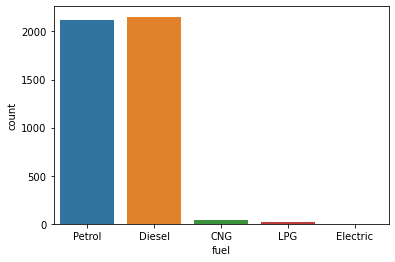

In [14]:
sns.countplot("fuel", data=data)
plt.show()

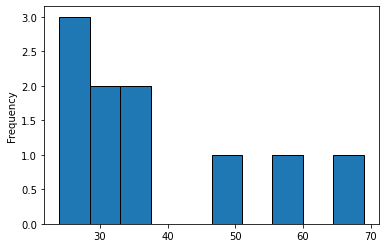

In [15]:
data['name'].value_counts()[:10].plot(kind='hist',ec='k')
plt.show()

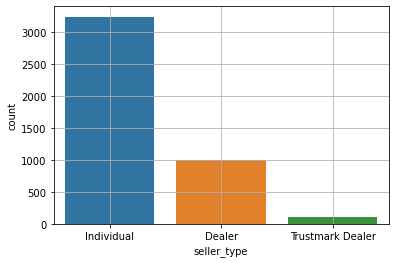

In [16]:
sns.countplot("seller_type", data=data)
plt.grid()
plt.show()

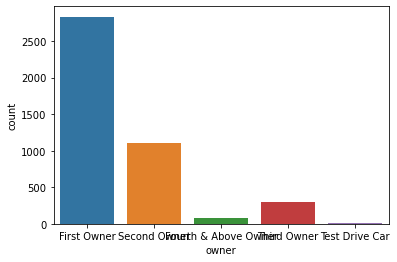

In [17]:
sns.countplot("owner", data=data)
plt.show()

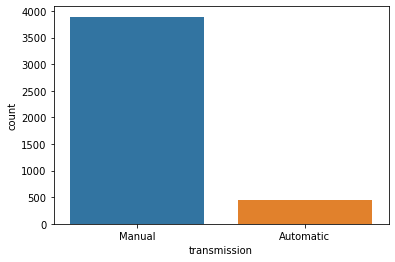

In [18]:
sns.countplot("transmission", data=data)
plt.show()

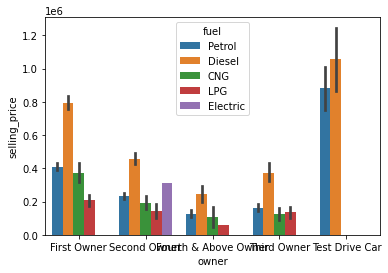

In [19]:
sns.barplot(x="owner", y="selling_price", hue="fuel", data=data)
plt.show()

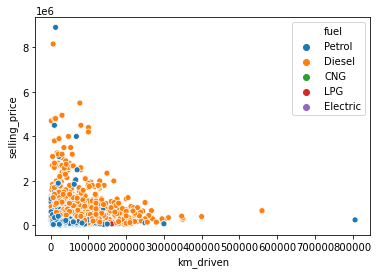

In [20]:
sns.scatterplot(x="km_driven", y="selling_price", hue="fuel", data=data)
plt.show()

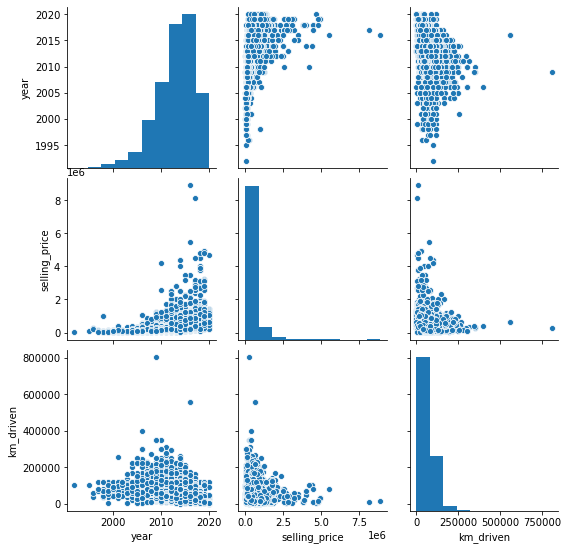

In [21]:
sns.pairplot(data)
plt.show()

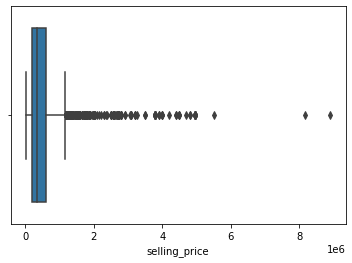

In [22]:
sns.boxplot('selling_price', data=data)
plt.show()

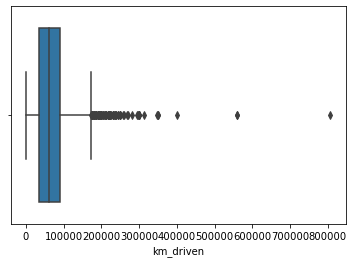

In [23]:
sns.boxplot('km_driven', data=data)
plt.show()

In [24]:
a=data['name'].value_counts()[:10]
a

Maruti Swift Dzire VDI      69
Maruti Alto 800 LXI         59
Maruti Alto LXi             47
Hyundai EON Era Plus        35
Maruti Alto LX              35
Maruti Wagon R VXI BS IV    29
Maruti Swift VDI BSIV       29
Maruti Swift VDI            27
Hyundai EON Magna Plus      24
Maruti Wagon R LXI Minor    24
Name: name, dtype: int64

In [25]:
data[data['selling_price']>=2000000][["name","fuel","km_driven","seller_type","selling_price"]].sort_values('selling_price',ascending=False)[:10]


,name,fuel,km_driven,seller_type,selling_price
3872,Audi RS7 2015-2019 Sportback Performance,Petrol,13000,Dealer,8900000
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,Diesel,6500,Dealer,8150000
3969,Mercedes-Benz GLS 2016-2020 350d 4MATIC,Diesel,77350,Dealer,5500000
919,BMW X5 xDrive 30d xLine,Diesel,30000,Dealer,4950000
555,BMW X5 xDrive 30d xLine,Diesel,30000,Dealer,4950000
2739,BMW X5 xDrive 30d xLine,Diesel,30000,Dealer,4950000
612,BMW X5 xDrive 30d xLine,Diesel,30000,Dealer,4950000
900,BMW X5 xDrive 30d xLine,Diesel,30000,Dealer,4950000
593,BMW X5 xDrive 30d xLine,Diesel,30000,Dealer,4950000
574,BMW X5 xDrive 30d xLine,Diesel,30000,Dealer,4950000


for col in data.columns:
    fig,(ax1,ax2)=plt.subplots(1,2,dpi=100, figsize=(12,6))
    ax1.hist(data[col], label=col, bins=50, ec='k')
    ax2.scatter(data[col], data['selling_price'], alpha=0.4)
    ax2.set_xlabel(col)
    ax2.set_ylabel('selling_price')
    
    plt.show()

In [26]:
corr_matrix=data.corr()

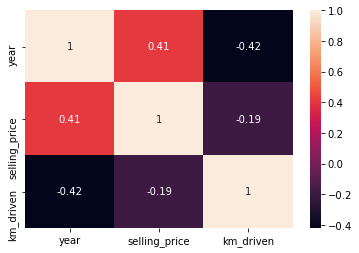

In [27]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [28]:
data.corrwith(data['selling_price'])

year             0.413922
selling_price    1.000000
km_driven       -0.192289
dtype: float64

# Train- Test split

In [29]:
car=data.copy()

In [30]:
car.shape

(4340, 8)

In [31]:
car.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [32]:
features=car.drop(['selling_price'],axis=1)

In [33]:
label=car['selling_price']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test=train_test_split(features, label, test_size=0.2, random_state=42)

In [36]:
x_train.shape

(3472, 7)

In [37]:
y_train.shape

(3472,)

In [38]:
x_test.shape

(868, 7)

In [39]:
y_test.shape

(868,)

# Preparation the dataset for Model

In [40]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3472 entries, 227 to 860
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          3472 non-null   object
 1   year          3472 non-null   int64 
 2   km_driven     3472 non-null   int64 
 3   fuel          3472 non-null   object
 4   seller_type   3472 non-null   object
 5   transmission  3472 non-null   object
 6   owner         3472 non-null   object
dtypes: int64(2), object(5)
memory usage: 217.0+ KB


In [41]:
car_num=['year','km_driven']
car_cat=['fuel','seller_type','transmission']
car_catt=['name','owner']

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin

In [43]:
year_ix=1
class CombinedAttributeAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_attributes=True):
        self._add_attributes=add_attributes
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        age=2020-X[:,year_ix]
        return np.c_[X,age]
        #            return np.c_[X]
    def fit_transform(self,X,y=None):
        self.fit(X,y)
        return self.transform(X,y)
            

In [44]:
num_pipeline=Pipeline(
                [
                    ('imputer', SimpleImputer(strategy='median')),
                    ('attributes_adder', CombinedAttributeAdder()),
                    ('std_scaler', StandardScaler())
                ])

In [45]:
from sklearn.compose import ColumnTransformer

In [46]:
full_pipeline=ColumnTransformer([
    ("num",num_pipeline, car_num),
    ("hot_cat", OneHotEncoder(handle_unknown='error'),car_cat),
    ("ord_cat",OrdinalEncoder(),car_catt)
])

In [47]:
car_tr=full_pipeline.fit_transform(x_train)
car_tr=pd.DataFrame(car_tr, columns=[*car_num,'Diesel','Petrol','CNG','LPG','Electric','Individual','Dealer','Trustmark Dealer','Manual'
                                      ,'Automatic','name','owner','Age'])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


In [48]:
car_tr.columns

Index(['year', 'km_driven', 'Diesel', 'Petrol', 'CNG', 'LPG', 'Electric',
       'Individual', 'Dealer', 'Trustmark Dealer', 'Manual', 'Automatic',
       'name', 'owner', 'Age'],
      dtype='object')

# Training and Evaluating on the model

1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Random Forest Regression
5. Gradient Boosting Regression

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [50]:
lin_reg=LinearRegression()

In [51]:
lin_reg.fit(car_tr,y_train)

LinearRegression()

In [52]:
car_predict=lin_reg.predict(car_tr)
car_predict[:5]

array([741792.75157744, 738377.49442094, 268139.55293019, 496359.44981916,
       749163.56781561])

In [53]:
y_train.to_numpy()[:5]

array([1500000,  500000,   92800,   95000,  685000], dtype=int64)

In [54]:
print('Mean Absolute Error: ', mean_absolute_error(y_train, car_predict))
print('Mean Squared Error: ', mean_squared_error(y_train, car_predict))
print('Root Mean Squared Error: ', np.sqrt(mean_absolute_error(y_train, car_predict)))

Mean Absolute Error:  234505.5987539771
Mean Squared Error:  180783588949.14062
Root Mean Squared Error:  484.2577813045208


In [55]:
from sklearn.metrics import r2_score
r2=r2_score(y_train, car_predict)
print("Accuracy: ", r2_score(y_train, car_predict)*100)

Accuracy:  47.130500676436824


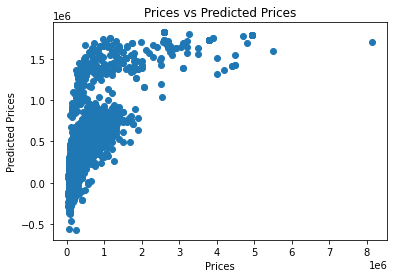

In [56]:
plt.scatter(y_train, car_predict)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()

# Decision Tree Regressor

In [57]:
from sklearn.tree import DecisionTreeRegressor
tre_reg=DecisionTreeRegressor()
tre_reg.fit(car_tr, y_train)
car_tree_predict=tre_reg.predict(car_tr)


In [58]:
car_tree_predict[:5]

array([1500000.,  500000.,   92800.,   95000.,  685000.])

In [59]:
y_train[:5]

227     1500000
964      500000
2045      92800
1025      95000
4242     685000
Name: selling_price, dtype: int64

In [60]:
print(" Error : ", np.sqrt(mean_squared_error(y_train,car_tree_predict)))
print("Accuracy: ", r2_score(y_train, car_tree_predict)*100)

 Error :  5560.135826340403
Accuracy:  99.9909589890417


# RandomForestRegressor

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
for_reg=RandomForestRegressor()

In [63]:
for_reg.fit(car_tr, y_train)

RandomForestRegressor()

In [64]:
car_for_predict=for_reg.predict(car_tr)

In [65]:
car_for_predict[:5]

array([1321849.99,  571300.  ,  107840.  ,  117310.  ,  678100.  ])

In [66]:
y_train[:5]

227     1500000
964      500000
2045      92800
1025      95000
4242     685000
Name: selling_price, dtype: int64

In [67]:
print("Mean Absolute Error: ", mean_absolute_error(y_train, car_for_predict))
print("Mean Squared Error: ", mean_absolute_error(y_train, car_for_predict))
print("Root Mean Squared Error: ", np.sqrt(mean_absolute_error(y_train, car_for_predict)))


Mean Absolute Error:  40094.77596386968
Mean Squared Error:  40094.77596386968
Root Mean Squared Error:  200.2367997244005


In [68]:
r2_for=r2_score(y_train, car_for_predict)
print("Accuracy: ", r2_for*100)

Accuracy:  97.19592054684695


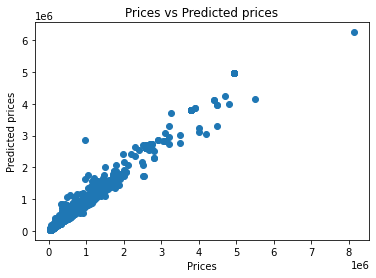

In [69]:
plt.scatter(y_train, car_for_predict)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

# Ridge

In [70]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [72]:
rg_lin=Ridge(alpha=1, solver='cholesky')
parameters={'alpha': [1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(rg_lin,parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(car_tr, y_train)



GridSearchCV(cv=5, estimator=Ridge(alpha=1, solver='cholesky'),
             param_grid={'alpha': [1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [74]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 5}
-182175612741.7746


## Lasso Regression

In [75]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [76]:
ls_lin=Lasso()
parameters={'alpha':[1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
lasso_regressor=GridSearchCV(ls_lin, parameters, scoring="neg_mean_squared_error", cv=5)
lasso_regressor.fit(car_tr, y_train)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1629545814905.0, tolerance: 95013488134.39359
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1676656453424.9375, tolerance: 97839292871.66475
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1619205089763.125, tolerance: 95025135638.42152
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [79]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-182165761161.768


In [ ]:
lasso_regressor=